In [74]:
def read_graph_ELEARNING(filename):
    graph = []
    with open(filename, 'r') as file:
        # Skip the first line
        if "gset" in filename:
            nodes, edges = file.readline().split()
            nodes = int(nodes)
            edges = int(edges)
        else:
            file.readline()
            file.readline()
            nodes = int(file.readline().split()[0])
            edges = int(file.readline().split()[0])
        for line in file:
            # Split each line into components and convert to appropriate types
            node1, node2, weight = line.split()
            graph.append((int(node1)-1, int(node2)-1, float(weight)))
    return graph, nodes, edges

#path = """graphs (elearning)/SW10000EWD.txt"""
path = """../graphs (gset)/G59.txt"""
edges, n_nodes, n_edges = read_graph_ELEARNING(path)
n_nodes, n_edges

(5000, 29570)

In [75]:
import random
import math
import matplotlib.pyplot as plt

random.seed(124348)

def simulated_annealing_partition(edges, n_nodes, temperature=1000, cooling_rate=0.995):
    exp_f = []
    randommm = []
    # Step 1: Extract unique nodes
    nodes = range(n_nodes)
    
    # Step 2: Initialize partitions randomly
    partition = {node: random.choice([0, 1]) for node in nodes}
    
    # Initialize current cost
    current_cut = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])

    best_partition = partition.copy()
    best_cut = current_cut
    while temperature > 1e-3:
        # Step 3: Randomly select a node to move to the opposite partition
        node = random.choice(nodes)
        partition[node] = 1 - partition[node]  # Flip partition
        
        # Calculate the new cost after swapping
        new_cut = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])
        
        # Step 4: Determine if we should accept the new solution
        cost_diff = new_cut - current_cut

        randomm = random.random()
        try:
            if cost_diff < 0:
                exp_f.append(math.exp(cost_diff / temperature))
                randommm.append(randomm)
        except:
            pass
        if cost_diff > 0 or randomm < math.exp(cost_diff / temperature):
            # Accept the move
            current_cut = new_cut
            # Update the best partition if new cost is lower
            if new_cut > best_cut:
                best_cut = new_cut
                best_partition = partition.copy()
        else:
            # Reject the move (revert the change)
            partition[node] = 1 - partition[node]
        
        # Step 5: Cool down the temperature
        temperature *= cooling_rate
    
    S = set([node for node, part in best_partition.items() if part == 0])
    T = set(range(n_nodes)) - S
    return exp_f, randommm

exp_f, randommm = simulated_annealing_partition(edges, n_nodes)

In [76]:
plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})

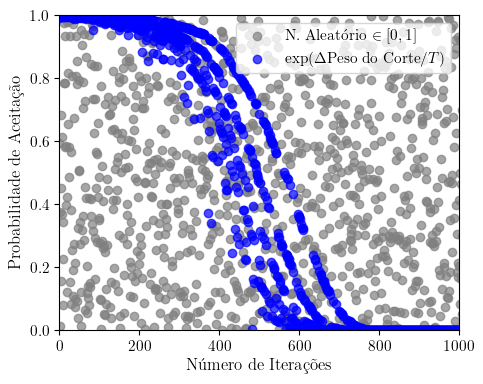

In [77]:
plt.scatter(range(len(randommm)), randommm, color='gray', label=r'N. Aleatório $\in [0, 1]$', alpha=0.7)
plt.scatter(range(len(exp_f)), exp_f, label=r"$\exp({\Delta \mathrm{Peso\ do\ Corte} / T})$", color='blue', alpha=0.7)
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel("Número de Iterações")
plt.ylabel("Probabilidade de Aceitação")
plt.legend()
plt.tight_layout()
plt.savefig("SA_DecrAceit.png", transparent=True)
plt.show()